In [469]:
import pandas as pd

In [470]:
df = pd.read_csv("IMDb Movies India.csv",encoding='latin1')

In [471]:
df.head()

,Name,Year,Duration,Genre,Rating,Votes,Director,Actor 1,Actor 2,Actor 3
0,,NaN,NaN,Drama,NaN,NaN,J.S. Randhawa,Manmauji,Birbal,Rajendra Bhatia
1,#Gadhvi (He thought he was Gandhi),(2019),109 min,Drama,7.0,8,Gaurav Bakshi,Rasika Dugal,Vivek Ghamande,Arvind Jangid
2,#Homecoming,(2021),90 min,"Drama, Musical",NaN,NaN,Soumyajit Majumdar,Sayani Gupta,Plabita Borthakur,Roy Angana
3,#Yaaram,(2019),110 min,"Comedy, Romance",4.4,35,Ovais Khan,Prateik,Ishita Raj,Siddhant Kapoor
4,...And Once Again,(2010),105 min,Drama,NaN,NaN,Amol Palekar,Rajat Kapoor,Rituparna Sengupta,Antara Mali


In [472]:
missing_values = df.isnull().sum()

In [473]:
null_values = pd.DataFrame(missing_values, columns=['missing_count'])

In [474]:
null_values['missing_%'] = null_values.apply(lambda x : x/df.shape[0]*100)

In [475]:
null_values

,missing_count,missing_%
Name,0,0.000000
Year,528,3.404475
Duration,8269,53.317429
Genre,1877,12.102650
Rating,7590,48.939326
Votes,7589,48.932878
Director,525,3.385131
Actor 1,1617,10.426204
Actor 2,2384,15.371720
Actor 3,3144,20.272100


In [476]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15509 entries, 0 to 15508
Data columns (total 10 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Name      15509 non-null  object 
 1   Year      14981 non-null  object 
 2   Duration  7240 non-null   object 
 3   Genre     13632 non-null  object 
 4   Rating    7919 non-null   float64
 5   Votes     7920 non-null   object 
 6   Director  14984 non-null  object 
 7   Actor 1   13892 non-null  object 
 8   Actor 2   13125 non-null  object 
 9   Actor 3   12365 non-null  object 
dtypes: float64(1), object(9)
memory usage: 1.2+ MB


### there are two many missinf values in dataset we must remove them

In [477]:
df = df.dropna().reset_index(drop = True)

In [478]:
df['Duration'] = df['Duration'].str.replace('min','').str.strip()
df['Duration'] = pd.to_numeric(df['Duration'])

In [479]:
df['Votes'] = df['Votes'].str.replace(',','').str.strip()
df['Votes'] = pd.to_numeric(df['Votes'])

In [480]:
df.drop_duplicates(subset=["Name","Year"],keep = 'first', inplace=True)

In [481]:
df

,Name,Year,Duration,Genre,Rating,Votes,Director,Actor 1,Actor 2,Actor 3
0,#Gadhvi (He thought he was Gandhi),(2019),109,Drama,7.0,8,Gaurav Bakshi,Rasika Dugal,Vivek Ghamande,Arvind Jangid
1,#Yaaram,(2019),110,"Comedy, Romance",4.4,35,Ovais Khan,Prateik,Ishita Raj,Siddhant Kapoor
2,...Aur Pyaar Ho Gaya,(1997),147,"Comedy, Drama, Musical",4.7,827,Rahul Rawail,Bobby Deol,Aishwarya Rai Bachchan,Shammi Kapoor
3,...Yahaan,(2005),142,"Drama, Romance, War",7.4,1086,Shoojit Sircar,Jimmy Sheirgill,Minissha Lamba,Yashpal Sharma
4,?: A Question Mark,(2012),82,"Horror, Mystery, Thriller",5.6,326,Allyson Patel,Yash Dave,Muntazir Ahmad,Kiran Bhatia
...,...,...,...,...,...,...,...,...,...,...
5654,Zubaan,(2015),115,Drama,6.1,408,Mozez Singh,Vicky Kaushal,Sarah Jane Dias,Raaghavv Chanana
5655,Zubeidaa,(2001),153,"Biography, Drama, History",6.2,1496,Shyam Benegal,Karisma Kapoor,Rekha,Manoj Bajpayee
5656,Zulm Ki Zanjeer,(1989),125,"Action, Crime, Drama",5.8,44,S.P. Muthuraman,Chiranjeevi,Jayamalini,Rajinikanth
5657,Zulmi,(1999),129,"Action, Drama",4.5,655,Kuku Kohli,Akshay Kumar,Twinkle Khanna,Aruna Irani


In [482]:
df['Year'] = df['Year'].str.strip('()').astype(int)

In [483]:
df['Main_Genre'] = df['Genre'].str.split(',').str[0]

In [484]:
df.columns

Index(['Name', 'Year', 'Duration', 'Genre', 'Rating', 'Votes', 'Director',
       'Actor 1', 'Actor 2', 'Actor 3', 'Main_Genre'],
      dtype='object')

### We have cleaned the data lets now perform eda 

# 1) univariate analysis on numerical column

In [485]:
import seaborn as sns
import matplotlib.pyplot as plt

C:\Users\dhruv\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\dhruv\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


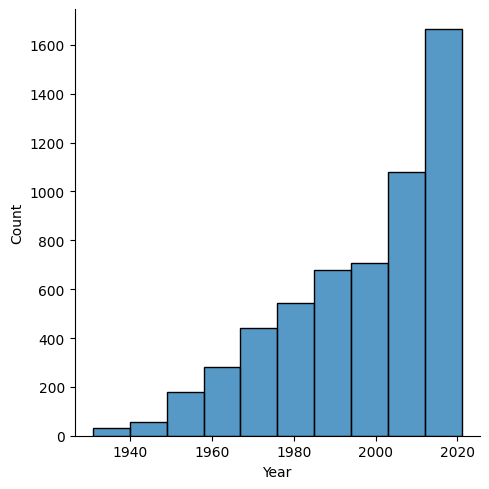

In [486]:
sns.displot(data = df, x = 'Year',bins =10)

C:\Users\dhruv\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\dhruv\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


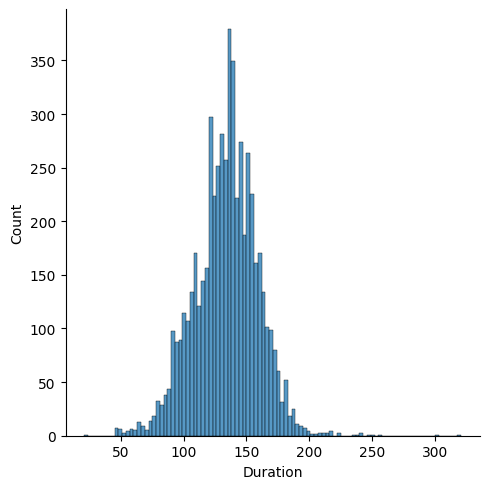

In [487]:
sns.displot(data = df, x = 'Duration',bins = 100)

C:\Users\dhruv\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\dhruv\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


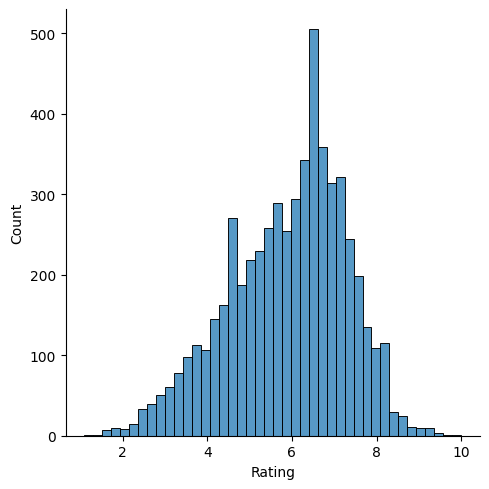

In [488]:
sns.displot(data = df, x = 'Rating')

C:\Users\dhruv\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


<Axes: xlabel='Rating', ylabel='Density'>

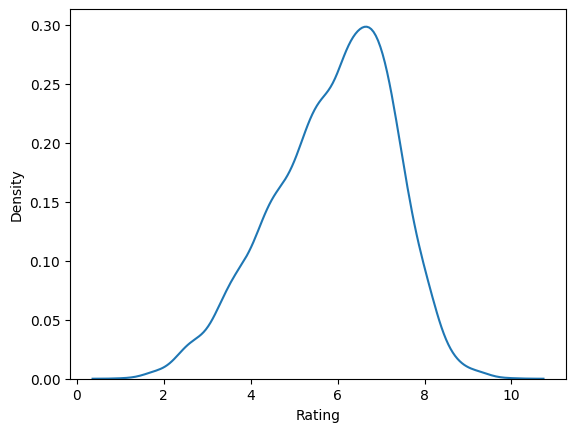

In [489]:
sns.kdeplot(data = df, x = 'Rating')

<Axes: xlabel='Year', ylabel='Votes'>

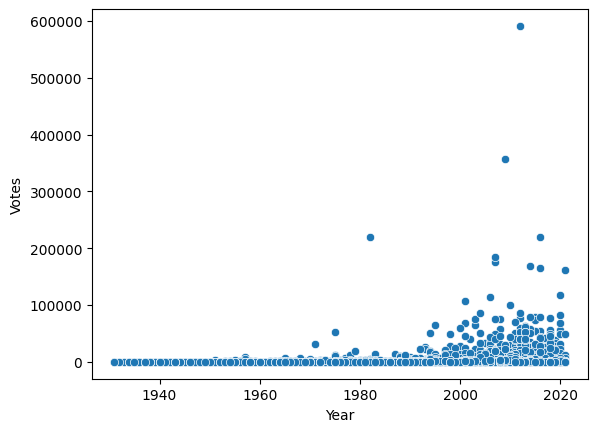

In [490]:
sns.scatterplot(data = df, y = 'Votes', x = 'Year')

C:\Users\dhruv\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


<Axes: xlabel='Votes', ylabel='Density'>

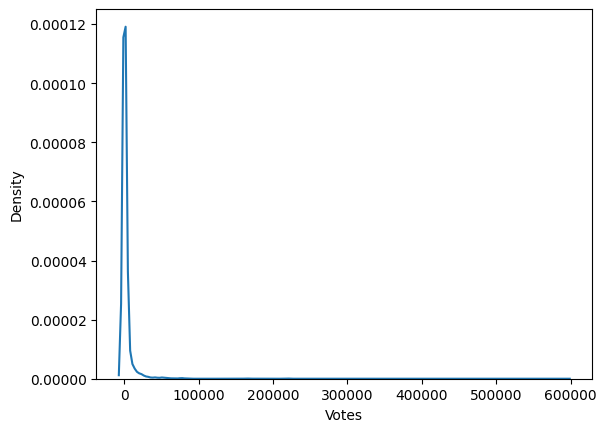

In [491]:
sns.kdeplot(data = df, x = 'Votes')

### Categorical plot

In [492]:
df.columns

Index(['Name', 'Year', 'Duration', 'Genre', 'Rating', 'Votes', 'Director',
       'Actor 1', 'Actor 2', 'Actor 3', 'Main_Genre'],
      dtype='object')

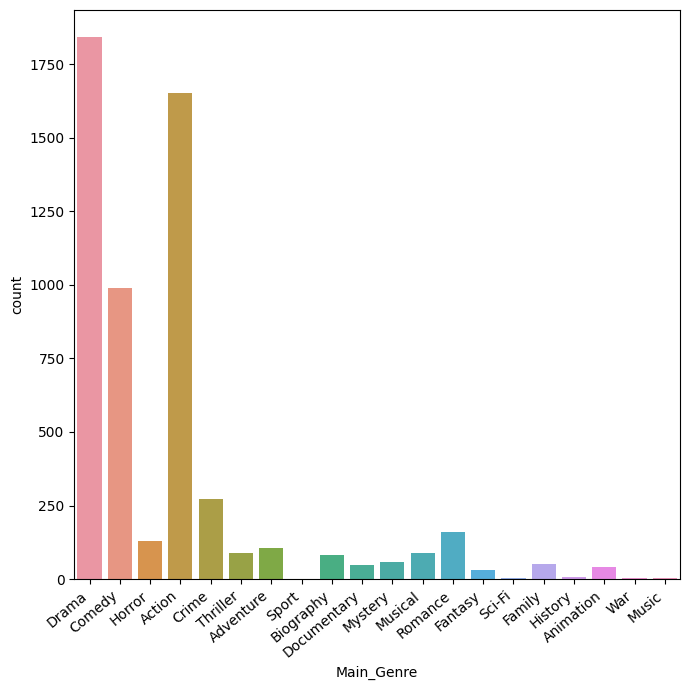

In [493]:
plt.figure(figsize = (7,7))
ax = sns.countplot(data = df, x = 'Main_Genre')
ax.set_xticklabels(ax.get_xticklabels(), rotation=40, ha="right")
plt.tight_layout()
plt.show()

C:\Users\dhruv\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\dhruv\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


<Axes: xlabel='Year', ylabel='Rating'>

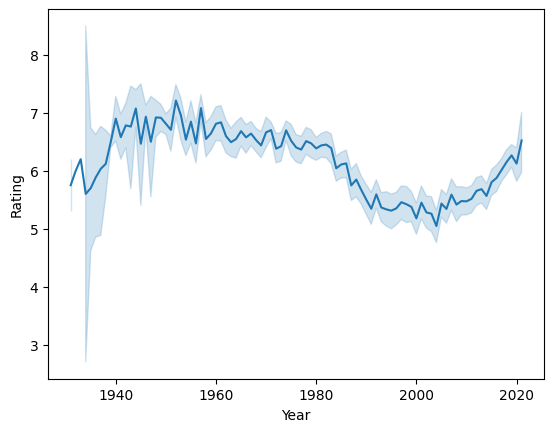

In [494]:
sns.lineplot(data = df, x = 'Year', y ='Rating')

In early years average rating was higher 

C:\Users\dhruv\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\dhruv\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


<Axes: xlabel='Year', ylabel='Votes'>

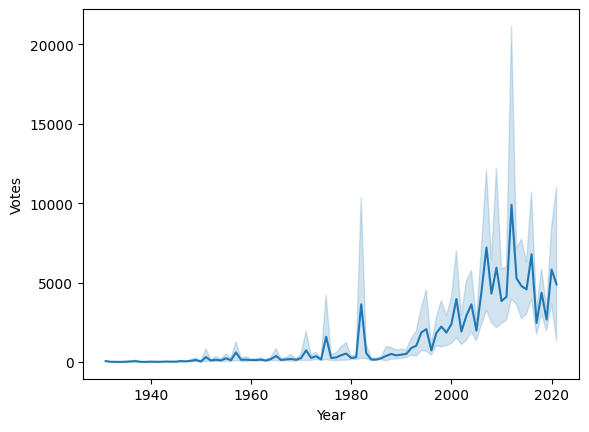

In [495]:
sns.lineplot(data = df, x = 'Year', y ='Votes')

In [496]:
# top directors with more than 10 movies by rating 
top_director = df.groupby('Director').agg({
    'Rating':['mean','count']   
}).reset_index()

top_director = top_director[top_director['Rating']['count']>10].sort_values(by = [('Rating','mean')],ascending = False).head(10)

In [497]:
top_director

Director    Rating      
                                mean count
668                 Gulzar  7.552941    17
236         Anurag Kashyap  7.400000    13
405              Bimal Roy  7.375000    12
2322           Vijay Anand  7.281818    11
731   Hrishikesh Mukherjee  7.266667    33
2059         Shyam Benegal  7.250000    22
662        Govind Nihalani  7.236364    11
1534            Raj Kapoor  7.145455    11
1264       Nagesh Kukunoor  7.072727    11
454           Chetan Anand  7.016667    12

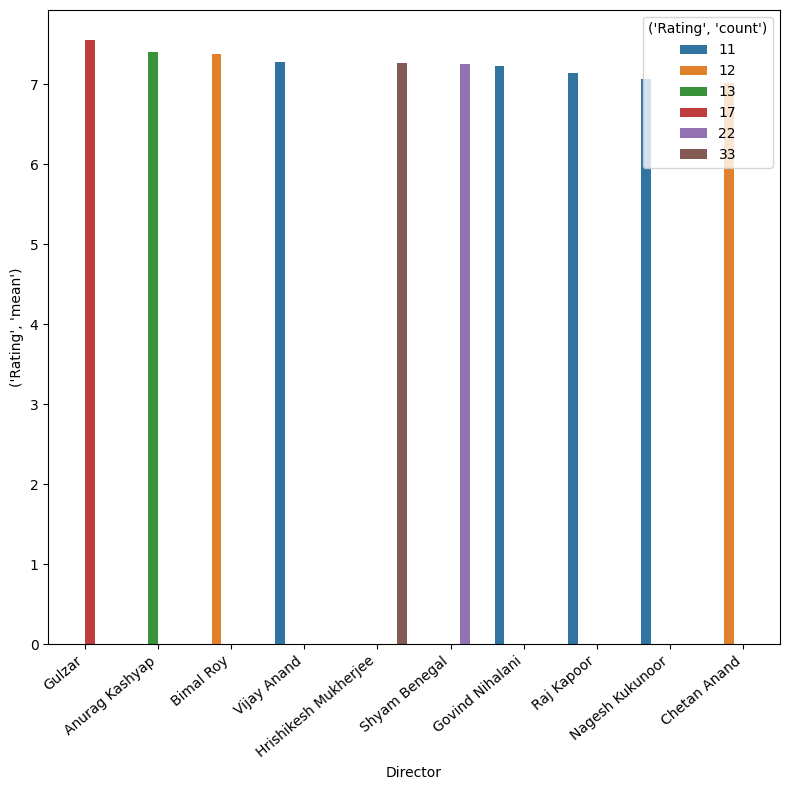

In [498]:

plt.figure(figsize = (8,8))
ax = sns.barplot(data = top_director, x = 'Director',y=('Rating','mean'),hue=('Rating','count'))
ax.set_xticklabels(ax.get_xticklabels(), rotation=40, ha="right")
plt.tight_layout()
plt.show()

In [499]:
top_actor = df.groupby('Actor 1').agg({
    'Rating':['mean','count']   
}).reset_index()

top_actor = top_actor[top_actor['Rating']['count']>10].sort_values(by = [('Rating','mean')],ascending = False).head(10)

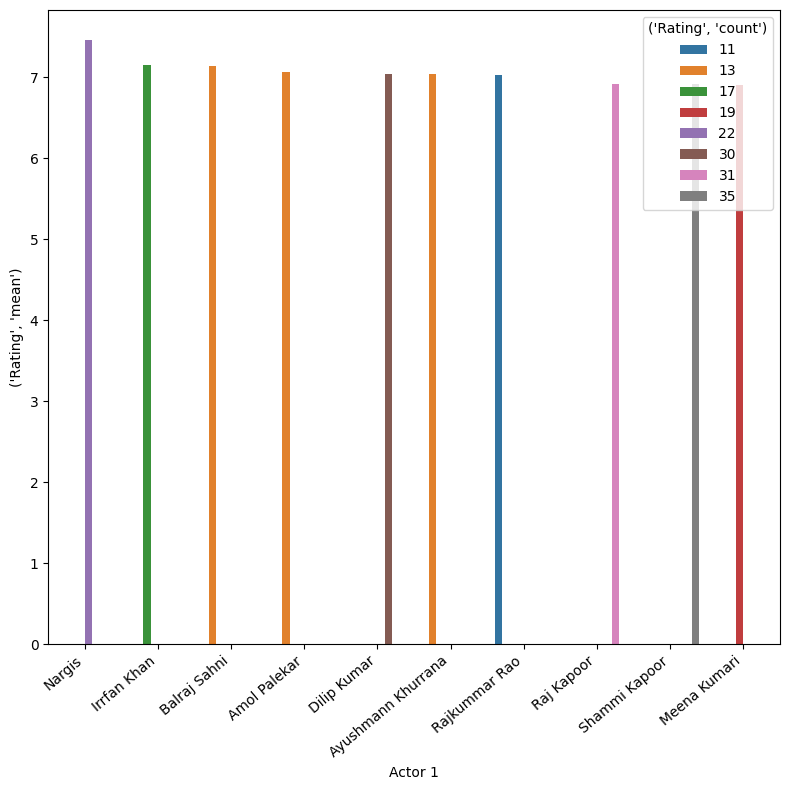

In [500]:
plt.figure(figsize = (8,8))
ax = sns.barplot(data = top_actor, x = 'Actor 1',y=('Rating','mean'),hue=('Rating','count'))
ax.set_xticklabels(ax.get_xticklabels(), rotation=40, ha="right")
plt.tight_layout()
plt.show()

In [501]:
top_actor2 = df.groupby('Actor 2').agg({
    'Rating':['mean','count']   
}).reset_index()

top_actor2 = top_actor2[top_actor2['Rating']['count']>10].sort_values(by = [('Rating','mean')],ascending = False).head(10)

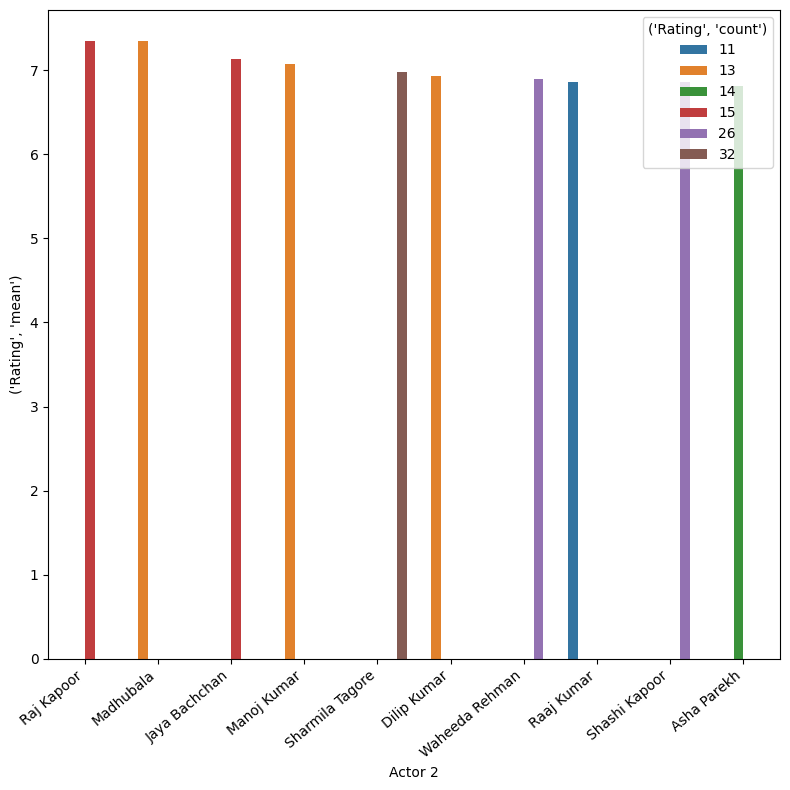

In [502]:
plt.figure(figsize = (8,8))
ax = sns.barplot(data = top_actor2, x = 'Actor 2',y=('Rating','mean'),hue=('Rating','count'))
ax.set_xticklabels(ax.get_xticklabels(), rotation=40, ha="right")
plt.tight_layout()
plt.show()

In [503]:
top_actor3 = df.groupby('Actor 3').agg({
    'Rating':['mean','count']   
}).reset_index()

top_actor3 = top_actor3[top_actor3['Rating']['count']>10].sort_values(by = [('Rating','mean')],ascending = False).head(10)

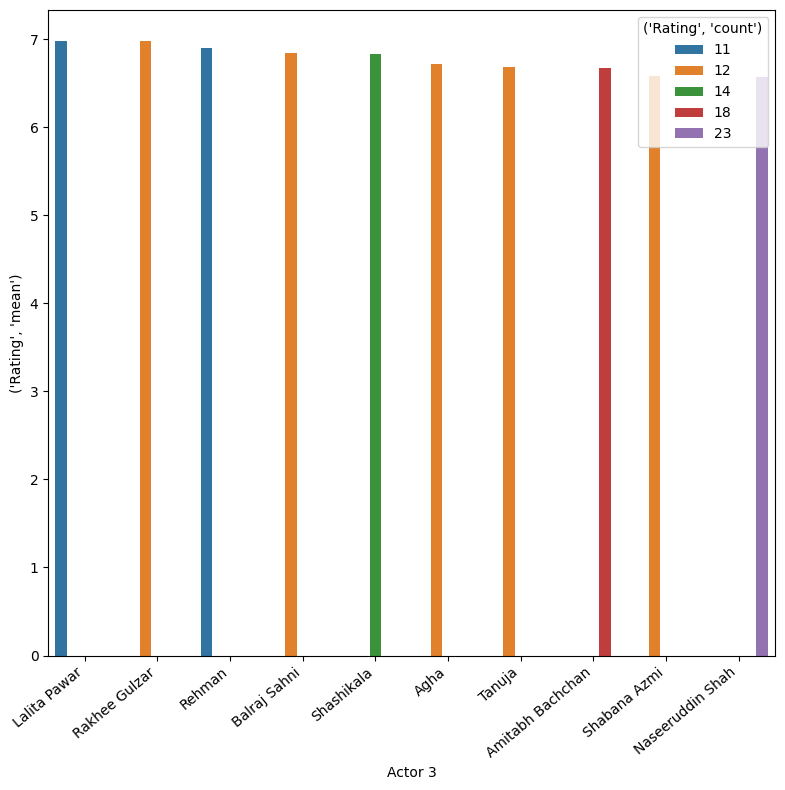

In [504]:
plt.figure(figsize = (8,8))
ax = sns.barplot(data = top_actor3, x = 'Actor 3',y=('Rating','mean'),hue=('Rating','count'))
ax.set_xticklabels(ax.get_xticklabels(), rotation=40, ha="right")
plt.tight_layout()
plt.show()

In [527]:
from sklearn.model_selection import train_test_split
from xgboost import XGBRegressor
from sklearn.preprocessing import RobustScaler
from sklearn.ensemble import StackingRegressor
from sklearn.linear_model import RidgeCV
import sklearn.metrics as metricst
import category_encoders as ce
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.metrics import r2_score

In [506]:
df =df.drop(columns=["Name","Main_Genre"])
X = df.drop(columns="Rating")
y = df["Rating"]

In [507]:
df.columns

Index(['Year', 'Duration', 'Genre', 'Rating', 'Votes', 'Director', 'Actor 1',
       'Actor 2', 'Actor 3'],
      dtype='object')

In [508]:
encoder = ce.JamesSteinEncoder(return_df=True)

In [509]:
encoder

JamesSteinEncoder()

In [510]:
encoder.fit(X,y)
X = encoder.transform(X)

In [511]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [519]:
X.columns

Index(['Year', 'Duration', 'Genre', 'Votes', 'Director', 'Actor 1', 'Actor 2',
       'Actor 3'],
      dtype='object')

In [515]:
columns = ['Year', 'Duration', 'Genre', 'Votes', 'Director', 'Actor 1','Actor 2', 'Actor 3']

preprocessor = ColumnTransformer(
    transformers=[
        ('columns', RobustScaler(), columns)  # passthrough for binary columns
    ])
preprocessor

ColumnTransformer(transformers=[('binary', RobustScaler(),
                                 ['Year', 'Duration', 'Genre', 'Votes',
                                  'Director', 'Actor 1', 'Actor 2',
                                  'Actor 3'])])

In [522]:
pipeline = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('regressor', XGBRegressor())
])
pipeline

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('binary', RobustScaler(),
                                                  ['Year', 'Duration', 'Genre',
                                                   'Votes', 'Director',
                                                   'Actor 1', 'Actor 2',
                                                   'Actor 3'])])),
                ('regressor',
                 XGBRegressor(base_score=None, booster=None, callbacks=None,
                              colsample_bylevel=None, colsample_bynode=None,
                              colsample_bytree=None, device=None,
                              early_stopping_rounds=None,
                              enable_...
                              feature_types=None, gamma=None, grow_policy=None,
                              importance_type=None,
                              interaction_constraints=None, learning_rate=None,
                              max_bin=None, max_cat_threshold=None,
                              max_cat_to_onehot=None, max_delta_step=None,
                              max_depth=None, max_leaves=None,
                              min_child_weight=None, missing=nan,
                              monotone_constraints=None, multi_strategy=None,
                              n_estimators=None, n_jobs=None,
                              num_parallel_tree=None, random_state=None, ...))])

In [524]:
pipeline.fit(X_train,y_train)

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('binary', RobustScaler(),
                                                  ['Year', 'Duration', 'Genre',
                                                   'Votes', 'Director',
                                                   'Actor 1', 'Actor 2',
                                                   'Actor 3'])])),
                ('regressor',
                 XGBRegressor(base_score=None, booster=None, callbacks=None,
                              colsample_bylevel=None, colsample_bynode=None,
                              colsample_bytree=None, device=None,
                              early_stopping_rounds=None,
                              enable_...
                              feature_types=None, gamma=None, grow_policy=None,
                              importance_type=None,
                              interaction_constraints=None, learning_rate=None,
                              max_bin=None, max_cat_threshold=None,
                              max_cat_to_onehot=None, max_delta_step=None,
                              max_depth=None, max_leaves=None,
                              min_child_weight=None, missing=nan,
                              monotone_constraints=None, multi_strategy=None,
                              n_estimators=None, n_jobs=None,
                              num_parallel_tree=None, random_state=None, ...))])

In [526]:
y_pred = pipeline.predict(X_test)

In [528]:
r2_score(y_pred,y_test)

0.8049574395616919